In [1]:
import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt
import collections
from colour import Color
import random
from matplotlib import animation, rc
from IPython.display import HTML

def user_to_series(dict_obj):
    renamed = {}
    for k in dict_obj.keys():
        nk = "user_%s" % k
        v = dict_obj[k]
        renamed[nk] = v
    ret = pd.Series(renamed)
    return ret
    
    
series_data = []
with open("fake_tweets.json") as data:
    text = data.read().strip()
    rows = text.split("\n")
for row in rows:
    series_data.append(json.loads(row))
    
tweet_df = pd.DataFrame(series_data)
tweet_df = pd.concat([tweet_df, tweet_df['user'].apply(user_to_series)], axis=1)
tweet_df.drop("user", axis=1, inplace=True)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28040 entries, 0 to 28039
Data columns (total 15 columns):
created_at                 28040 non-null object
id                         28040 non-null int64
id_str                     28040 non-null object
in_reply_to_screen_name    10405 non-null object
in_reply_to_user_id        10405 non-null object
in_reply_to_user_id_str    10405 non-null object
liked_count                28040 non-null int64
retweet_count              28040 non-null int64
source                     28040 non-null object
text                       28040 non-null object
user_id                    28040 non-null object
user_screen_name           28040 non-null object
user_location              28040 non-null object
user_description           28040 non-null object
user_url                   28040 non-null object
dtypes: int64(3), object(12)
memory usage: 3.2+ MB


In [2]:
tweet_df["created"] = pd.to_datetime(tweet_df["created_at"])
tweet_df.sort_values(by="created", inplace=True)
tweet_df.drop("created_at", inplace=True, axis=1)
#tweet_df.set_index("created", inplace=True)
tweet_df

,id,id_str,in_reply_to_screen_name,in_reply_to_user_id,in_reply_to_user_id_str,liked_count,retweet_count,source,text,user_id,user_screen_name,user_location,user_description,user_url,created
658,8519028260155833,8519028260155833,janeevans,5614682264138,[5614682264138],1,4,Data Faker,Provide Mr positive these worry avoid.,8868241683558,hrichardson,"605 Warner Fort\nPerezhaven, NH 83541",Faked profile Data,https://russell-howell.net/,2019-05-12 00:00:52
883,3988736425626212,3988736425626212,morrisjeffrey,0080212276998,[0080212276998],0,0,Data Faker,Theory boy try between.,6172595676497,peter00,"384 David Islands Suite 822\nNorth Wendy, AK 6...",Faked profile Data,http://johnson-ray.com/,2019-05-12 00:04:10
635,9722942522647481,9722942522647481,derrickbarton,4436652179614,[4436652179614],0,0,Data Faker,Benefit middle less carry share agent teacher ...,4535954776610,lisa83,"96755 Darlene Village\nEast Joseview, MO 45044",Faked profile Data,http://diaz-hobbs.org/,2019-05-12 00:05:06
875,1771091014557902,1771091014557902,inelson,7393700675375,[7393700675375],0,0,Data Faker,Move change listen which.,1075661662965,fieldsryan,"50283 Jones Hills\nPort Michaelview, ND 91101",Faked profile Data,http://www.castillo.com/,2019-05-12 00:06:47
8,3500763139711201,3500763139711201,NaN,NaN,NaN,0,0,Data Faker,Nation far all later spring order senior boy.,5589792538816,marysilva,"169 Rebecca Fall Apt. 117\nWest Melanie, NC 36510",Faked profile Data,https://davis-ho.com/,2019-05-12 00:06:56
468,7587855201655383,7587855201655383,NaN,NaN,NaN,1,0,Data Faker,Relationship common yard unit third early toni...,8299076349027,kylemartinez,"211 Alexander Trail Suite 773\nKrystalton, MS ...",Faked profile Data,http://hill-mendez.com/,2019-05-12 00:10:31
846,5634679778430930,5634679778430930,uking,3393522822838,[3393522822838],0,1,Data Faker,Up democratic threat big central memory others...,9085452064252,lindafinley,10843 Murphy Throughway Suite 030\nAmandaburgh...,Faked profile Data,https://www.reed.info/,2019-05-12 00:11:03
356,3929332598485986,3929332598485986,NaN,NaN,NaN,0,0,Data Faker,Instead pull economic also reduce energy itsel...,2095528787760,alvarezzachary,"PSC 2114, Box 9887\nAPO AP 03845",Faked profile Data,http://may.info/,2019-05-12 00:12:57
767,9668370131189787,9668370131189787,vbarnes,7898308582570,[7898308582570],3,4,Data Faker,Need memory reflect mind plan world special ex...,6611493343631,cgonzales,"00006 Jacob Stravenue Suite 546\nBishopland, R...",Faked profile Data,http://www.ramirez-chan.biz/,2019-05-12 00:14:16
434,9287601734262215,9287601734262215,NaN,NaN,NaN,1,2,Data Faker,Peace somebody front building them situation c...,3387911367895,rbaker,"4771 Lindsay Circles\nSimpsonton, DC 59249",Faked profile Data,http://mills.com/,2019-05-12 00:14:17


In [12]:
G = nx.Graph()
G.add_nodes_from(tweet_df["user_screen_name"])
for idx in tweet_df.index:
    row = tweet_df.loc[idx]
    if row["in_reply_to_screen_name"] is None:
        G.add_node(row["user_screen_name"])
    else:
        G.add_edge(row["in_reply_to_screen_name"], row["user_screen_name"])

generating 100 frames


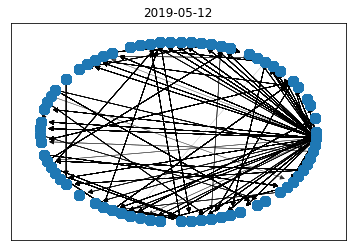

In [23]:
from datetime import datetime

fig, ax = plt.subplots()
graph = nx.DiGraph()
pos = nx.shell_layout(G)
frames = 100
print("generating %d frames" % frames)
tweet_indexes = tweet_df.index.to_list()
def get_fig(frame_number):
    global ax
    #print(frame_number)
    idx = tweet_indexes[frame_number]
    current_edge = tweet_df.iloc[idx]
    date_str = datetime.strftime(current_edge["created"], "%Y-%m-%d")
    v = current_edge["user_screen_name"]
    if current_edge["in_reply_to_screen_name"] == None:
        if v not in list(graph.nodes.keys()):
            graph.add_node(v, Position=pos[u])
    else:
        u = current_edge["in_reply_to_screen_name"]
        if u not in list(graph.nodes.keys()):
            graph.add_node(u, Position=pos[u])
        if v not in list(graph.nodes.keys()):
            graph.add_node(v, Position=pos[v])
        graph.add_edge(u, v)
    ax.set_title(date_str)
    posi=nx.get_node_attributes(graph,'Position')
    nx.draw_networkx_nodes(graph, pos=nx.get_node_attributes(graph,'Position'), ax=ax, node_size=100)
    nx.draw_networkx_edges(graph, posi, width=0.5, edge_color='k', style='dotted', alpha=0.25, ax=ax)
    return (fig,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, get_fig, frames=frames, interval=70, blit=True)
HTML(anim.to_html5_video())